In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns
application_df = application_df.drop(['EIN','NAME', 'INCOME_AMT', 'ASK_AMT'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1,N,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,N,1
4,T3,Independent,C1000,Heathcare,Trust,1,N,1


In [3]:
# Determine the number of unique values in each column.
app = application_df.dtypes.index.tolist()
app

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'STATUS',
 'SPECIAL_CONSIDERATIONS',
 'IS_SUCCESSFUL']

In [4]:
application_df[app].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
STATUS                     2
SPECIAL_CONSIDERATIONS     2
IS_SUCCESSFUL              2
dtype: int64

In [5]:
app_type_count = application_df["APPLICATION_TYPE"].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
application_types_to_replace = list(app_type_count[app_type_count < 400].index)

for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
class_type_count = application_df["CLASSIFICATION"].value_counts()
class_type_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
classifications_to_replace = list(class_type_count[class_type_count<500])

for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
application_dummies = pd.get_dummies(application_df)
application_dummies.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [10]:
X = application_dummies.drop("IS_SUCCESSFUL", axis=1)
y = application_dummies["IS_SUCCESSFUL"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [11]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 20

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                5940      
                                                                 
 dense_1 (Dense)             (None, 20)                1220      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 7,181
Trainable params: 7,181
Non-trainable params: 0
_________________________________________________________________


In [13]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 5s 2ms/step - loss: 0.5841 - accuracy: 0.7155
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5617 - accuracy: 0.7255
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5595 - accuracy: 0.7265
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7276
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5573 - accuracy: 0.7277
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5560 - accuracy: 0.7291
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5552 - accuracy: 0.7275
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5548 - accuracy: 0.7291
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5551 - accuracy: 0.7290
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5538 - accura

In [15]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5652 - accuracy: 0.7245 - 505ms/epoch - 2ms/step
Loss: 0.565170168876648, Accuracy: 0.7245481014251709


<Axes: >

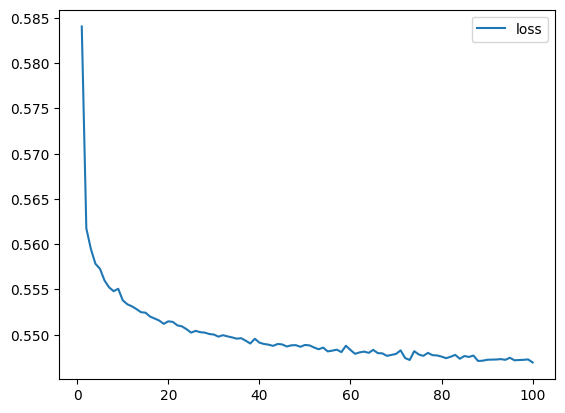

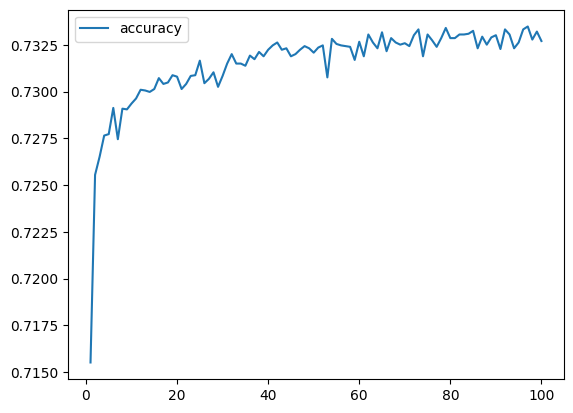

In [16]:
model_2 = pd.DataFrame(fit_model.history)

model_2.index += 1

model_2.plot(y='loss')

model_2.plot(y='accuracy')

In [17]:
nn.save('.../deep-learning-challenge/Models/AlphabetSoupCharity_Optimization.h5')